# Kenya Distribution Analysis

# Setup

## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Parameters

In [3]:
ALL_COUNTRIES_DATASET = "../../../data/RQ2/processed/all_countries_df.csv"

## Configuration

In [ ]:
%matplotlib inline

### Loading the datasets

In [4]:
df = pd.read_csv(ALL_COUNTRIES_DATASET)

In [5]:
df.head()

,country,measure,location,sex,age_sort,age,cause,year,val
0,United Kingdom,YLLs (Years of Life Lost),Wigan,Male,0,1 to 4,Diabetes mellitus,2010,2.403586
1,United Kingdom,YLLs (Years of Life Lost),Wigan,Female,0,1 to 4,Diabetes mellitus,2010,3.287731
2,United Kingdom,YLLs (Years of Life Lost),Wigan,Male,1,5 to 9,Diabetes mellitus,2010,1.983731
3,United Kingdom,YLLs (Years of Life Lost),Wigan,Female,1,5 to 9,Diabetes mellitus,2010,2.037679
4,United Kingdom,YLLs (Years of Life Lost),Wigan,Male,2,10 to 14,Diabetes mellitus,2010,2.203710


In [6]:
df = df[df['country'].str.fullmatch('Kenya')]

In [7]:
df.shape

(107160, 9)

### Look at distribution of deaths for all time data

#### Distribution for interpersonal violence (Deaths)

In [8]:
violence_deaths = df[df['measure'].str.fullmatch('Deaths')&
          df['cause'].str.fullmatch('Interpersonal violence')]

In [9]:
violence_deaths = violence_deaths.groupby(['location'], as_index=False).agg({'val':'mean'})

#### Distribution of diabetes for all countries (deaths)

In [10]:
diabetes_deaths = df[df['measure'].str.fullmatch('Deaths')&
          df['cause'].str.contains('Diabetes')]

In [11]:
diabetes_deaths = diabetes_deaths.groupby(['location'], as_index=False).agg({'val':'mean'})

### Distributions of interpersonal violence for all countries (YLLs)

In [12]:
violence_ylls = df[df['measure'].str.contains('YLL')&
          df['cause'].str.contains('violence')]

In [13]:
violence_ylls = violence_ylls.groupby(['location'], as_index=False).agg({'val':'mean'})

#### Distribution of diabetes for all countries (YLL's)

In [14]:
diabetes_ylls = df[df['measure'].str.contains('YLL')&
          df['cause'].str.contains('Diabetes')]

In [15]:
diabetes_ylls = diabetes_ylls.groupby(['location'], as_index=False).agg({'val':'mean'})

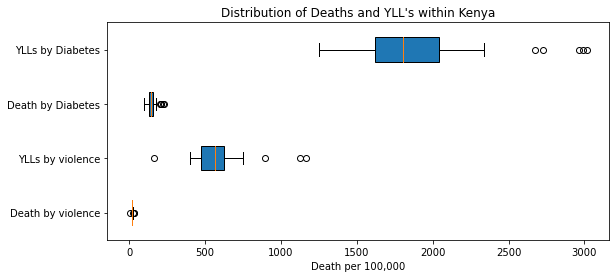

In [16]:
data1 = violence_deaths['val']
data2 = violence_ylls['val']
data3 = diabetes_deaths['val']
data4 = diabetes_ylls['val']


all_data = [data1, data2, data3, data4]
labels = ['Death by violence', 'YLLs by violence','Death by Diabetes', 'YLLs by Diabetes']

fig, ax = plt.subplots(figsize=(9, 4))

bplot = ax.boxplot(all_data, vert=False, patch_artist=True, labels=labels) 

ax.set_title("Distribution of Deaths and YLL's within Kenya")

ax.set_xlabel('Death per 100,000')

plt.show()

### Explore distributions of demographs

### location (deaths)

In [17]:
violence_location_deaths = violence_deaths.groupby(['location'], as_index=False).agg({'val':'mean'})

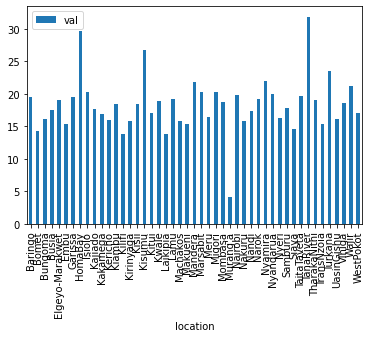

In [18]:
violence_location_deaths.plot(x="location", y="val", kind="bar")
plt.show()

In [19]:
diabetes_location_deaths = diabetes_deaths.groupby(['location'], as_index=False).agg({'val':'mean'})

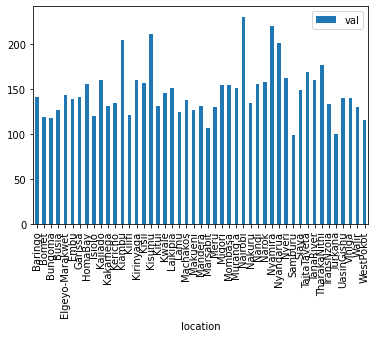

In [20]:
diabetes_location_deaths.plot(x="location", y="val", kind="bar")
plt.show()

### All violence age

### Deaths

In [21]:
violence_age_deaths = df[df['measure'].str.contains('Deaths')&
          df['cause'].str.contains('violence')]

In [22]:
violence_age_deaths = violence_age_deaths.groupby(['age_sort','age'], as_index=False).agg({'val':'mean'})

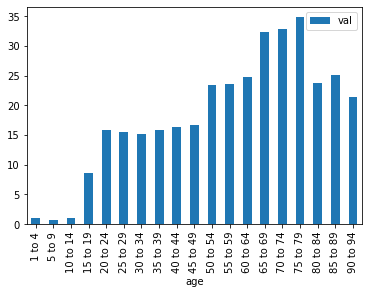

In [23]:
violence_age_deaths.plot(x="age", y="val", kind="bar")
plt.show()

### YLL

In [24]:
violence_age_ylls = df[df['measure'].str.contains('YLL')&
          df['cause'].str.contains('violence')]

In [25]:
violence_age_ylls = violence_age_ylls.groupby(['age_sort','age'], as_index=False).agg({'val':'mean'})

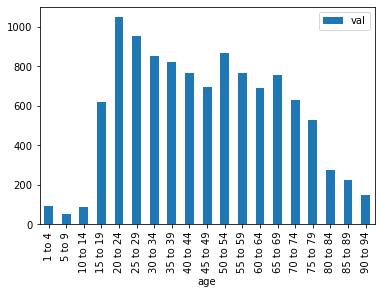

In [26]:
violence_age_ylls.plot(x="age", y="val", kind="bar")
plt.show()

### Diabetes

### Deaths

In [27]:
diabetes_age_deaths = df[df['measure'].str.contains('Deaths')&
          df['cause'].str.contains('Diabetes')]

In [28]:
diabetes_age_deaths = diabetes_age_deaths.groupby(['age_sort','age'], as_index=False).agg({'val':'mean'})

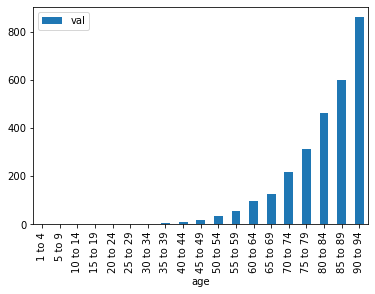

In [29]:
diabetes_age_deaths.plot(x="age", y="val", kind="bar")
plt.show()

### YLLs

In [30]:
diabetes_age_ylls = df[df['measure'].str.contains('YLL')&
          df['cause'].str.contains('Diabetes')]

In [31]:
diabetes_age_ylls = diabetes_age_ylls.groupby(['age_sort','age'], as_index=False).agg({'val':'mean'})

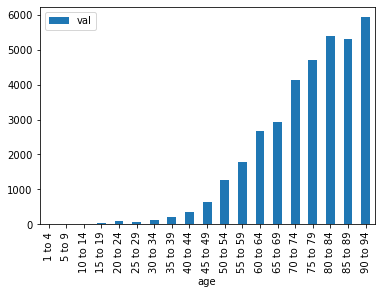

In [32]:
diabetes_age_ylls.plot(x="age", y="val", kind="bar")
plt.show()

## Get ratios of YLLs to deaths for both IV and diabetes 

In [36]:
mean_diabetes_deaths = df.groupby(['measure', 'cause'], as_index=False).agg({'val':'mean'})

mean_diabetes_deaths = mean_diabetes_deaths[mean_diabetes_deaths['cause'].str.contains('Diabetes')]
mean_diabetes_deaths = mean_diabetes_deaths[mean_diabetes_deaths['measure'].str.contains('Deaths')]
mean_diabetes_deaths = mean_diabetes_deaths['val'].iloc[0]
mean_diabetes_deaths

146.8277295493999

In [37]:
mean_diabetes_YLLs = df.groupby(['measure', 'cause'], as_index=False).agg({'val':'mean'})

mean_diabetes_YLLs = mean_diabetes_YLLs[mean_diabetes_YLLs['cause'].str.contains('Diabetes')]
mean_diabetes_YLLs = mean_diabetes_YLLs[mean_diabetes_YLLs['measure'].str.contains('YLLs')]
mean_diabetes_YLLs = mean_diabetes_YLLs['val'].iloc[0]
mean_diabetes_YLLs

1879.5038365937828

In [38]:
diabetes_ratio = mean_diabetes_YLLs/mean_diabetes_deaths
diabetes_ratio

12.80074167435401

In [39]:
mean_violence_deaths = df.groupby(['measure', 'cause'], as_index=False).agg({'val':'mean'})

mean_violence_deaths = mean_violence_deaths[mean_violence_deaths['cause'].str.contains('violence')]
mean_violence_deaths = mean_violence_deaths[mean_violence_deaths['measure'].str.contains('Deaths')]
mean_violence_deaths = mean_violence_deaths['val'].iloc[0]
mean_violence_deaths

18.344006993760644

In [40]:
mean_violence_YLLs = df.groupby(['measure', 'cause'], as_index=False).agg({'val':'mean'})

mean_violence_YLLs = mean_violence_YLLs[mean_violence_YLLs['cause'].str.contains('violence')]
mean_violence_YLLs = mean_violence_YLLs[mean_violence_YLLs['measure'].str.contains('YLLs')]
mean_violence_YLLs = mean_violence_YLLs['val'].iloc[0]
mean_violence_YLLs

572.449928202802

In [41]:
violence_ratio = mean_violence_YLLs/mean_violence_deaths
violence_ratio

31.206373198478918

In [42]:
violence_ratio/diabetes_ratio

2.437856648650302